In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from ipywidgets import Layout, interact, IntSlider, fixed
from IPython.display import Image
from scipy.stats import kstest,jarque_bera, anderson, shapiro
%config InlineBackend.figure_format = 'retina'

<div class="alert alert-block alert-info">
<h1> Central Limit theorem  </h1>

In [2]:
# picking samples

#From known distributions
def pick_sample(dist, sample_size):
    if dist == 'normal':
        # picking samples from norm dist with mean 3 and std deviation 0.5
        sample = np.random.normal(3, 0.5, sample_size)
    if dist == 'exponential':
        # picking samples from exponential dist with mean 3 and std dev 3
        sample = np.random.exponential(3, sample_size)
    if dist == 'poisson':
        # picking samples from poisson dist with mean 3 and std dev sqrt(3)=1.732
        sample = np.random.poisson(3, sample_size)
    if dist == 'uniform':
        # picking samples from uniform dist with mean 3 and std dev sqrt(3)=1.732'
        sample = np.random.uniform(0, 6, sample_size)

    return sample

#From real world population dataframe
def pick_sample_pop(df,coln,sample_size):
    return random.sample(list(df[coln]), sample_size)

In [3]:
# get the sampling distribution

#From known distributions
def get_sampling_dist(dist, sample_size, no_of_samples):
    pop_var = 0.25 if dist == 'normal' else 9 if dist == 'exponential' else 3 if dist == 'poisson' else 3
    print(
        f"""\npicking {no_of_samples} samples each of size {sample_size} from {dist} dist with mean 3 and variance {pop_var}""")

    sampling_dist = []
    for i in range(no_of_samples):
        sample = pick_sample(dist, sample_size)
        sample_mean = np.mean(sample)
        sampling_dist.append(sample_mean)
    print("")
    print(f'sampling distribution mean is :{np.mean(sampling_dist)}')
    print(f'sampling distribution variance is :{np.var(sampling_dist)}')
    print("")
    print(
        f'By Central Limit Theorem, sampling distribution variance should be [population variance/sample size]:{(pop_var)/sample_size}')
    print("")

    return sampling_dist

#From real world population dataframe
def get_sampling_dist_pop(df,coln, sample_size, no_of_samples):
    print(
        f"""\npicking {no_of_samples} {coln} samples each of size {sample_size}""")    
    sampling_dist = []
    for i in range(no_of_samples):
        sample = pick_sample_pop(df,coln, sample_size)
        sample_mean = np.mean(sample)
        sampling_dist.append(sample_mean)
    print("")
    print(f'sampling distribution mean is :{np.mean(sampling_dist)}')
    print(f'sampling distribution variance is :{np.var(sampling_dist)}')
    print("")
    return sampling_dist

In [4]:
#From known distributions
def plot_and_info_of_sampling_dist(dist, sample_size, no_of_samples, bins=10):
    sampling_dist = get_sampling_dist(
        dist=dist, sample_size=sample_size, no_of_samples=no_of_samples)
    print('JB test for normality: [if pvalue greater than 0.05, normality present')
    print(jarque_bera(sampling_dist))
    sns.set_style('darkgrid')
    sns.displot(sampling_dist, kde=True, height=5, aspect=1.5).set(
        title=f'sampling distribution [{dist} dist samples]')
    
#From real world population dataframe    
def plot_and_info_of_sampling_dist_pop(datafr, coln , sample_size, no_of_samples, bins=10):
    sampling_dist = get_sampling_dist_pop(datafr,coln, sample_size, no_of_samples)
    sns.set_style('darkgrid')
    sns.displot(sampling_dist, kde=True, height=5, aspect=1.5).set(
        title=f'sampling distribution [{coln} samples]') 
    print("")
    print(f'population mean is {np.mean(datafr[coln])}')
    print(f'population variance is {np.var(datafr[coln])}')
    print(
        f'By Central Limit Theorem, sampling distribution variance should be [population variance/sample size]:{(np.var(datafr[coln]))/sample_size}')
    print("")
    print('JB test for normality: [if pvalue greater than 0.05, normality present')
    print(jarque_bera(sampling_dist))
    

<div class="alert alert-block alert-warning">  

#### 1. Simulation through sampling from multiple known distributions

In [5]:
interact(plot_and_info_of_sampling_dist, dist=['poisson','exponential', 'normal', 'uniform'],
         sample_size=IntSlider(min=1, max=1500, step=1, value=15, layout=Layout(width='1000px')), \
         no_of_samples=IntSlider(min=1, max=10000, step=1, value=300, layout=Layout(width='1000px')))

interactive(children=(Dropdown(description='dist', options=('poisson', 'exponential', 'normal', 'uniform'), va…

<function __main__.plot_and_info_of_sampling_dist(dist, sample_size, no_of_samples, bins=10)>

<div class="alert alert-block alert-warning">  

### 2. Lets look at a realworld dataset now

##### We have a weather conditions dataset with Beijing's hourly weather information from 2010 to 2014.

In [6]:
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [7]:
df.shape

(43824, 13)

In [8]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')


<font color='blue' style = 'bold'> <u> Data Description</u> :</font>

weather data of beijing between Jan 1st, 2010 to Dec 31st, 2014 
[https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data]

No: row number

year: year of data in this row

month: month of data in this row

day: day of data in this row

hour: hour of data in this row

pm2.5: PM2.5 concentration (ug/m^3)

DEWP: Dew Point (°F)

**TEMP: Temperature (°F)**

**PRES: Pressure (hPa)**

cbwd: Combined wind direction

**Iws: Cumulated wind speed (m/s)**

Is: Cumulated hours of snow

Ir: Cumulated hours of rain

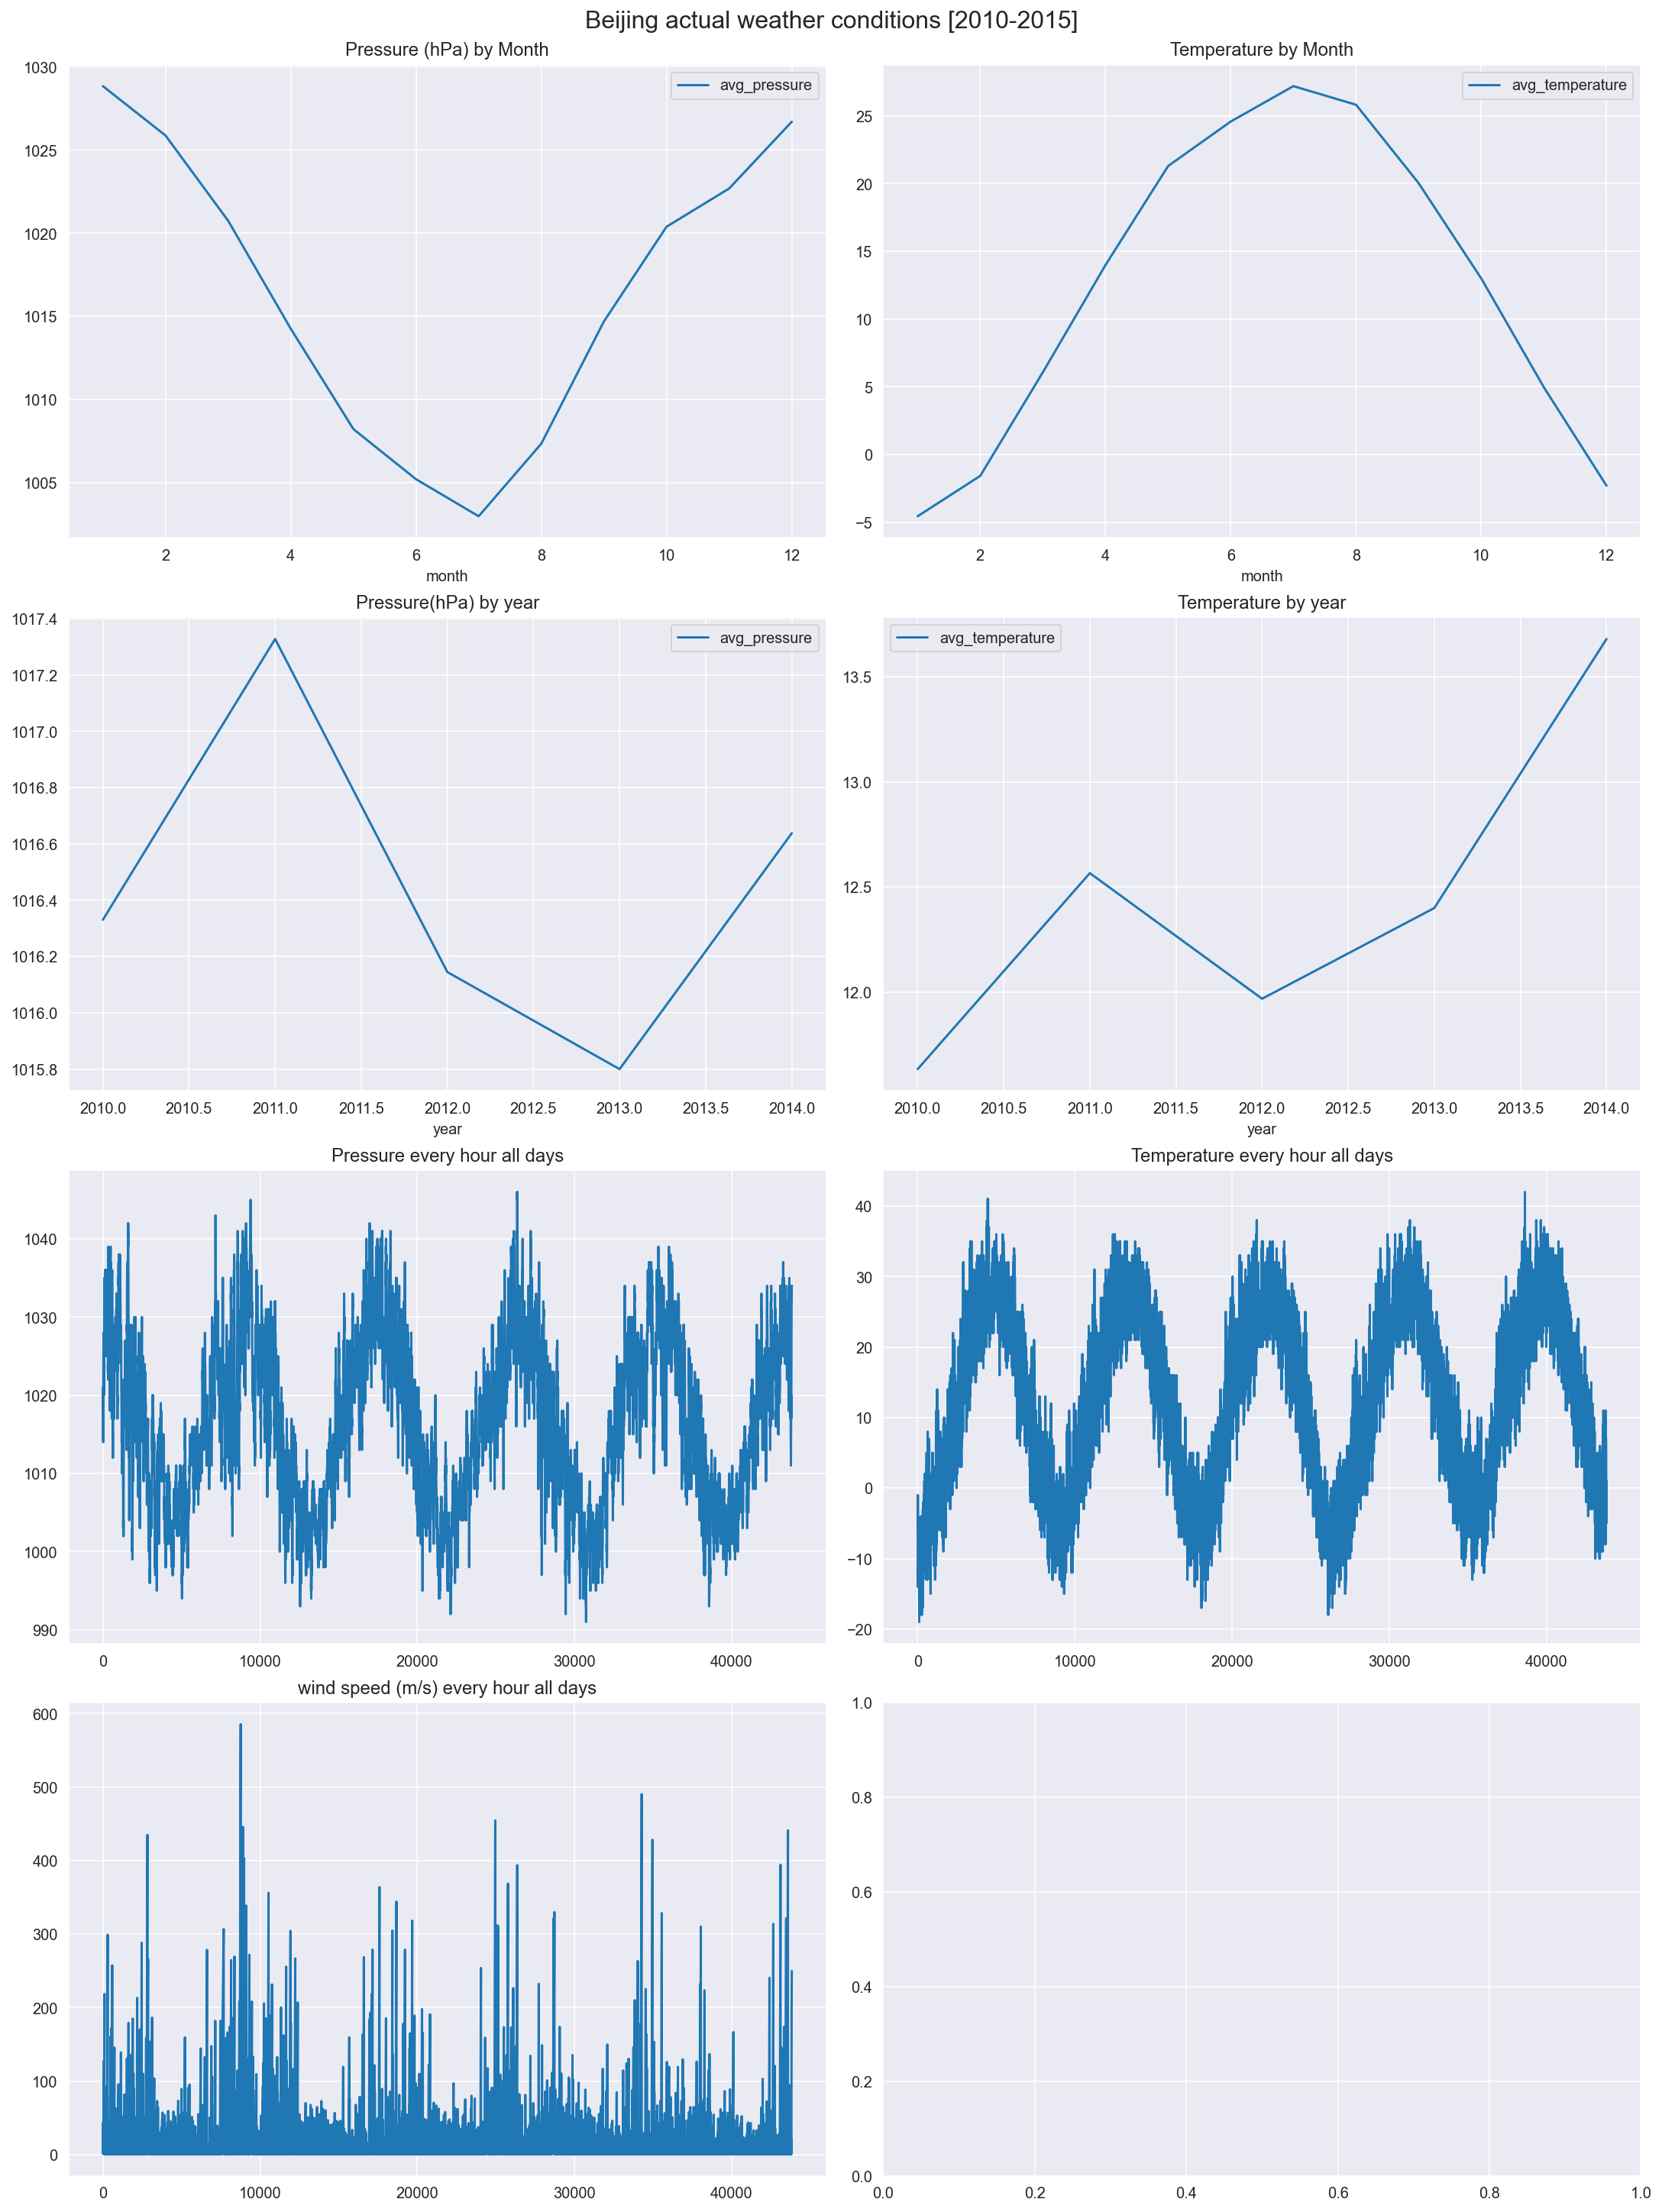

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20), constrained_layout=True)  # make one subplot (ax) on the figure
#fig.tight_layout()
axes = axes.flatten() # it comes out as a 2D matrix; convert to a vector

df.groupby(['month']).agg(avg_pressure=pd.NamedAgg(column='PRES', aggfunc='mean')).plot(title ='Pressure (hPa) by Month', ax = axes[0])
df.groupby(['month']).agg(avg_temperature=pd.NamedAgg(column='TEMP', aggfunc='mean')).plot(title ='Temperature by Month', ax = axes[1])

df.groupby(['year']).agg(avg_pressure=pd.NamedAgg(column='PRES', aggfunc='mean')).plot(title ='Pressure(hPa) by year', ax = axes[2])
df.groupby(['year']).agg(avg_temperature=pd.NamedAgg(column='TEMP', aggfunc='mean')).plot(title ='Temperature by year', ax = axes[3])

df['PRES'].plot(title ='Pressure every hour all days', ax = axes[4])
df['TEMP'].plot(title ='Temperature every hour all days', ax = axes[5])

df['Iws'].plot(title ='wind speed (m/s) every hour all days', ax = axes[6])

plt.suptitle('Beijing actual weather conditions [2010-2015]', size=16)
#fig.subplots_adjust(hspace=0.3)
plt.show()

[Text(0.5, 1.0, 'histogram of PRES (pressure) values')]

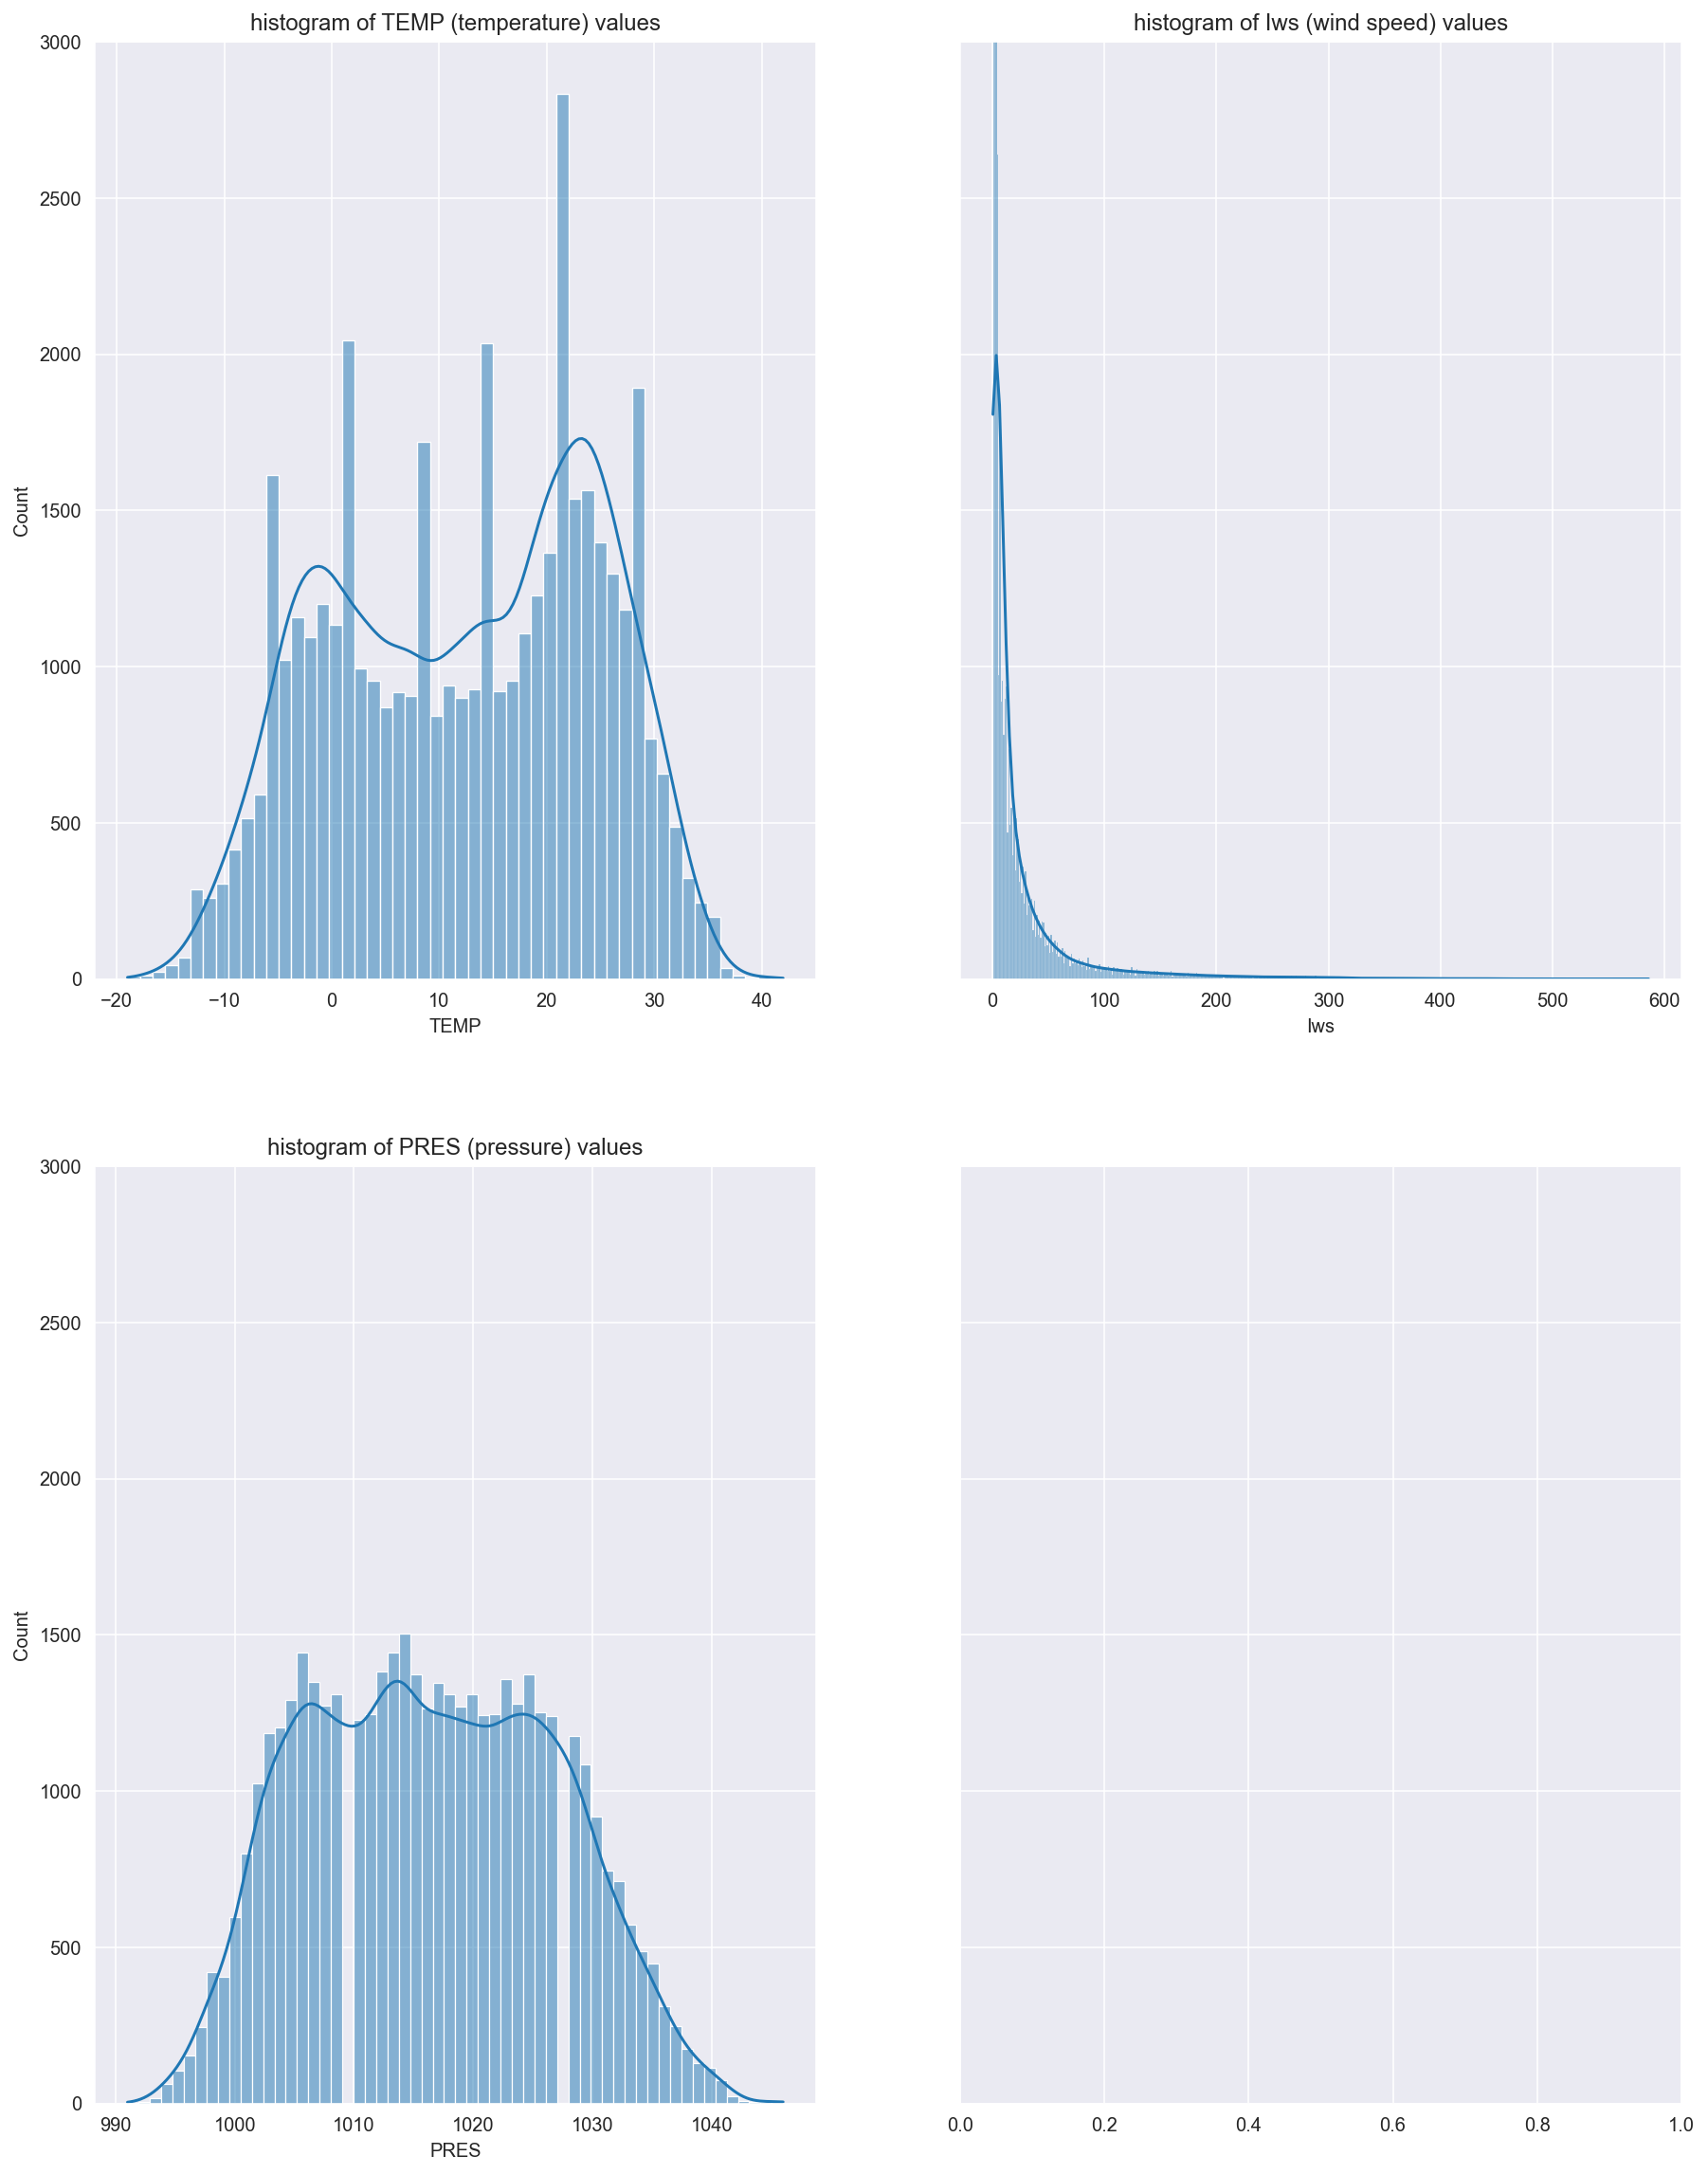

In [10]:
fig, axes = plt.subplots(2,2, figsize=(15,20), sharey = True)  # make one subplot (ax) on the figure
#fig.tight_layout()
#axes = axes.flatten() # it comes out as a 2D matrix; convert to a vector

sns.histplot(df['TEMP'], kde=True, ax = axes[0,0] ).set(title=f'histogram of TEMP (temperature) values')
axes[0,0].set_ylim(0, 3000)
sns.histplot(df['Iws'], kde=True, ax = axes[0,1] ).set(title=f'histogram of Iws (wind speed) values') 
sns.histplot(df['PRES'], kde=True, ax = axes[1,0] ).set(title=f'histogram of PRES (pressure) values') 

In [11]:
#plot_and_info_of_sampling_dist_pop(df, 'Iws' , 10000, 3000, bins=10)

interact(plot_and_info_of_sampling_dist_pop, datafr = fixed(df), coln=['TEMP','PRES', 'Iws'],
         sample_size=IntSlider(min=1, max=1500, step=1, value=15, layout=Layout(width='1000px')), \
         no_of_samples=IntSlider(min=1, max=10000, step=1, value=300, layout=Layout(width='1000px')))

interactive(children=(Dropdown(description='coln', options=('TEMP', 'PRES', 'Iws'), value='TEMP'), IntSlider(v…

<function __main__.plot_and_info_of_sampling_dist_pop(datafr, coln, sample_size, no_of_samples, bins=10)>